# Layers

> The layers of NN

In [ ]:
#| default_exp nn.layers

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import numpy as np
import matplotlib.pyplot as plt

from fastcore.basics import patch

In [ ]:
#| hide
# Define a input matrix
i = np.array(([1, 2], [1, 2], [1, 2]))

# Define a weigth matrix where each row are the weigths for each neuron.
w = np.array([[1, 2], [3, 4], [5, 6]]) 

# Multiply the vector with the transpose of the matrix
result = np.matmul(i, w.T)
result

array([[ 5, 11, 17],
       [ 5, 11, 17],
       [ 5, 11, 17]])

In [ ]:
#| export
class Dense:
    "Fully connected layer"
    def __init__(
            self, 
            n_inputs: int, # The number of features.
            n_neurons: int # The number of neurons to have for the layer.
        ):
        
        self.weights = np.random.randn(n_neurons, n_inputs) # each row are the weigths for each neuron.
        self.biases = np.random.randn(n_neurons)

In [ ]:
#| export
@patch
def forward(
        self: Dense,
        X: np.ndarray # shape of (batch_size, n_features) if a single batch is passed it has to be of shape (1, n_features).
    ) -> np.ndarray: # the output of the layer
    "Forward input `X` through the layer"
    
    self.output = np.matmul(X, self.weights.T) + self.biases
    
    return self.output

In [ ]:
#| export
def spiral_data(
        samples: int=100, # number of points per class
        classes: int=3 # number of classes
    ) -> tuple[np.ndarray, np.ndarray]: # X and y arrays's
    "Create spiral dataset"
    
    N = samples 
    D = 2 # dimensionality
    C = classes  

    X = np.zeros((N*C,D)) # data matrix (each row = single example)
    y = np.zeros(N*C, dtype='uint8') # class labels

    for j in range(C):
        ix = range(N*j, N*(j+1))
        r = np.linspace(0.0, 1, N) # radius
        t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N) * 0.2 # theta
        
        # t = t * 2 # scale the angle
        X[ix] = np.stack((r*np.sin(t), r*np.cos(t)), axis=-1)
        y[ix] = j
    
    return X, y

This code is inspired by this [course](https://cs231n.github.io/neural-networks-case-study/#data)

## Example usage

Make data and plot it

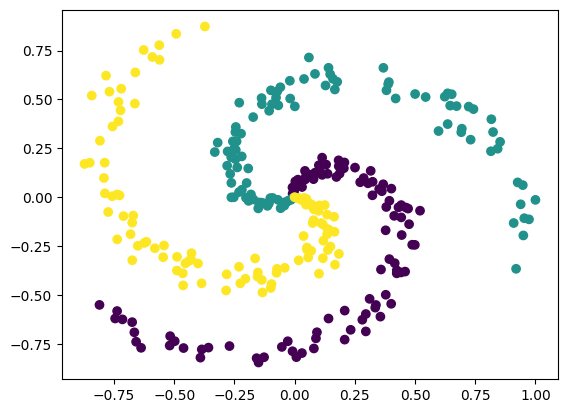

In [ ]:
X, y = spiral_data()

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

Create a `Dense` layer and `forward` pass through it

In [ ]:
dense = Dense(2, 3)

dense.forward(X)[:5]

array([[ 0.11514021,  0.4438316 , -0.29415088],
       [ 0.10561452,  0.44299997, -0.30237425],
       [ 0.08988609,  0.43807441, -0.31435629],
       [ 0.08586146,  0.44093092, -0.31927195],
       [ 0.08003018,  0.44218066, -0.32509621]])

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()